<a href="https://colab.research.google.com/github/richardmukechiwa/Pnuemonia-Xray-ImageClassification/blob/main/PnuemoniaClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
# checking libraries
!pip list

Package                            Version
---------------------------------- -------------------
absl-py                            1.4.0
accelerate                         1.1.1
aiohappyeyeballs                   2.4.4
aiohttp                            3.11.9
aiosignal                          1.3.1
alabaster                          1.0.0
albucore                           0.0.19
albumentations                     1.4.20
altair                             4.2.2
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.5.1
arviz                              0.20.0
astropy                            6.1.7
astropy-iers-data                  0.2024.12.2.0.35.34
astunparse                         1.6.3
async-timeout                      4.0.3
atpublic                           4.1.0
attrs                              24.2.0
audioread           

# **Import Libraries**

In [102]:
import os
import time
import copy
import glob
import random

import numpy as np
import pandas as pd
from PIL import Image

from tqdm.auto import tqdm
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms, datasets
from torchvision.models import resnet18, resnet34

# **Import Data**

In [55]:
# Check if GPU is available
print("Is GPU available:", torch.cuda.is_available())

# Get GPU name
if torch.cuda.is_available():
    print("GPU Name:", torch.cuda.get_device_name(0))



Is GPU available: True
GPU Name: Tesla T4


In [56]:
# define data directories
train_path = ("/content/drive/MyDrive/chest_xray/train")
test_path = ("/content/drive/MyDrive/chest_xray/test")
val_path = ("/content/drive/MyDrive/chest_xray/val")


In [57]:

#converting images to RGB
class ConvertToRGB:
  def __call__(self,img):
    if img.mode != "RGB":
      img = img.convert("RGB")
    return img


In [58]:
# transforming data
transform = transforms.Compose(
    [
        ConvertToRGB(),
        transforms.Resize((224, 224)),
        transforms.ToTensor(),

    ]
)


In [77]:
# creating  data sets
train_dataset = datasets.ImageFolder(root = train_path, transform = transform)
val_dataset = datasets.ImageFolder(root = val_path, transform = transform)
test_dataset = datasets.ImageFolder(root = test_path, transform = transform)



In [95]:

#Total number datapoints in each dataset
print("Total train images", len(train_dataset))
print("Total val images", len(val_dataset))
print("Total test images", len(test_dataset))


Total train images 3329
Total val images 20
Total test images 171


# **Data Exploration**

In [61]:
#checking train dataset classes
print("  Classes for training dataset")
print(train_dataset.classes)
print(f"That's {len(train_dataset.classes)}, classes")
print()
print("Tensor shape for one image is")
print(train_dataset[0][0].shape)

  Classes for training dataset
['normal', 'pneumonia']
That's 2, classes

Tensor shape for one image is
torch.Size([3, 224, 224])


The label is 1


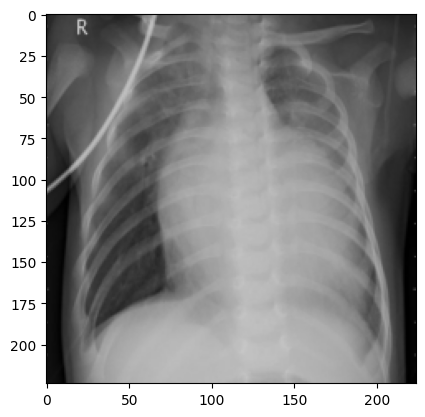

In [109]:
# Visualizing a sample image for pneumonia
image, label = train_dataset[-1]
plt.imshow(image.permute(1, 2, 0))
print("The label is", label)
plt.show()

The label is 0


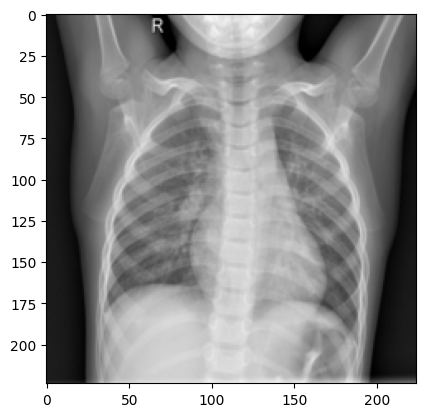

In [110]:
# Visualizing a sample image for normal
image, label = train_dataset[1]
plt.imshow(image.permute(1, 2, 0))
print("The label is", label)
plt.show()

In [112]:
from typing import Counter
def class_counts(dataset):
  c = Counter(x[1] for x in tqdm(dataset))
  class_to_index = dataset.dataset.class_to_idx
  return pd.Series({cat: c[idx] for cat, idx in class_to_index.items()})


In [114]:

train_counts = class_counts(train_dataset)
train_counts.plot(kind = 'bar')

  0%|          | 0/3329 [00:00<?, ?it/s]

AttributeError: 'ImageFolder' object has no attribute 'dataset'